## Part 1

For my data mining project, I will address the issue of customer churn across various industries using the Global Customer Churn Dataset obtained from Kaggle. Customer churn, or the rate at which customers discontinue their relationship with a company, poses a significant challenge for businesses. It directly impacts revenue and profitability. By developing a predictive model to identify at-risk customers and offering targeted retention strategies, I hope to assist companies in mitigating churn and fostering long-term customer relationships.

The primary problem I will address is the identification of factors influencing customer churn and the development of a predictive model to forecast churn probability. The dataset provides detailed customer profiles, including demographics, product interactions, credit scores, and various other attributes such as geographical location and the number of products they are using. Using this dataset, my goal is to find patterns and relationships that contribute to customer churn and utilize machine learning techniques to predict churn likelihood for individual customers.

The target for my model is to accurately identify customers who are at a high risk of churning, allowing businesses to proactively intervene with personalized retention efforts. By doing so, companies can optimize resources and creat custom retention strategies to meet the specific needs of each customer segment.

In [2]:
import pandas as pd

# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/cheribeda/datamining/main/Churn.csv'

# Load the data into a Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame to ensure it was imported correctly
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

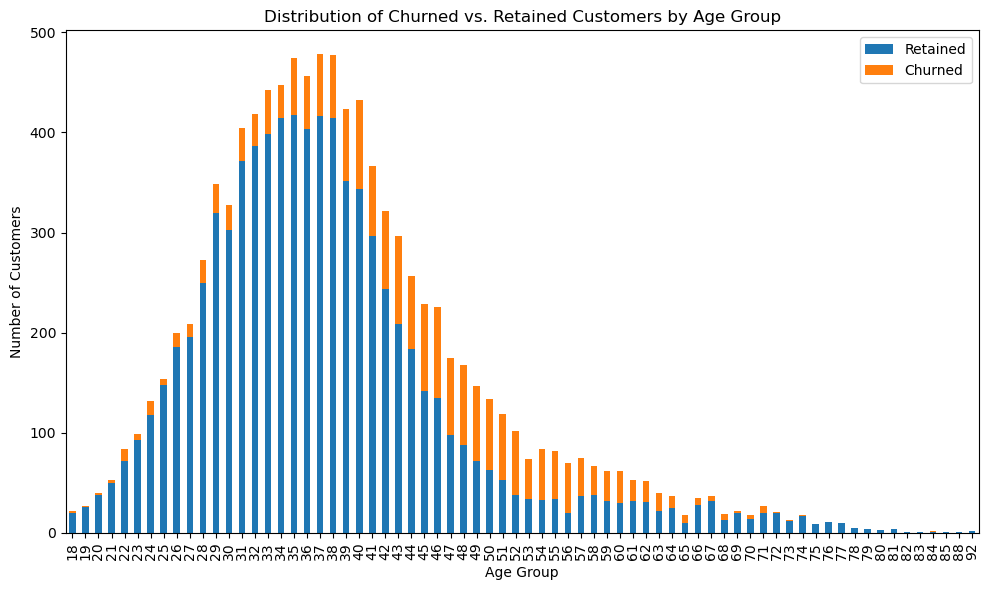

In [3]:
import matplotlib.pyplot as plt

# Group the data by age group and churn status, and count the number of customers in each group
age_churn_counts = df.groupby(['Age', 'Exited']).size().unstack()

# Plot the distribution of churned vs. retained customers by age group
age_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Churned vs. Retained Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.legend(['Retained', 'Churned'], loc='upper right')
plt.tight_layout()
plt.show()


This graph is a grouped bar chart titled "Distribution of Churned vs. Retained Customers by Age Group." The x-axis represents the age groups of customers, while the y-axis represents the number of customers. There are two sets of bars for each age group, with blue bars indicating the number of retained customers and orange bars indicating the number of churned customers.

This graph shows:

The largest number of customers, both retained and churned, appear in the middle age ranges.

There is a bell-shaped distribution for both churned and retained customers, indicating that most of the customers fall within the middle age range.

The churn rate (proportion of orange bars) appears to be consistent across age groups, with no dramatic spikes or drops, indicating that age alone might not be a strong predictor of churn.

Younger and older age groups show fewer customers overall, which is expected as these demographics might be less likely to use the service or change services less frequently.

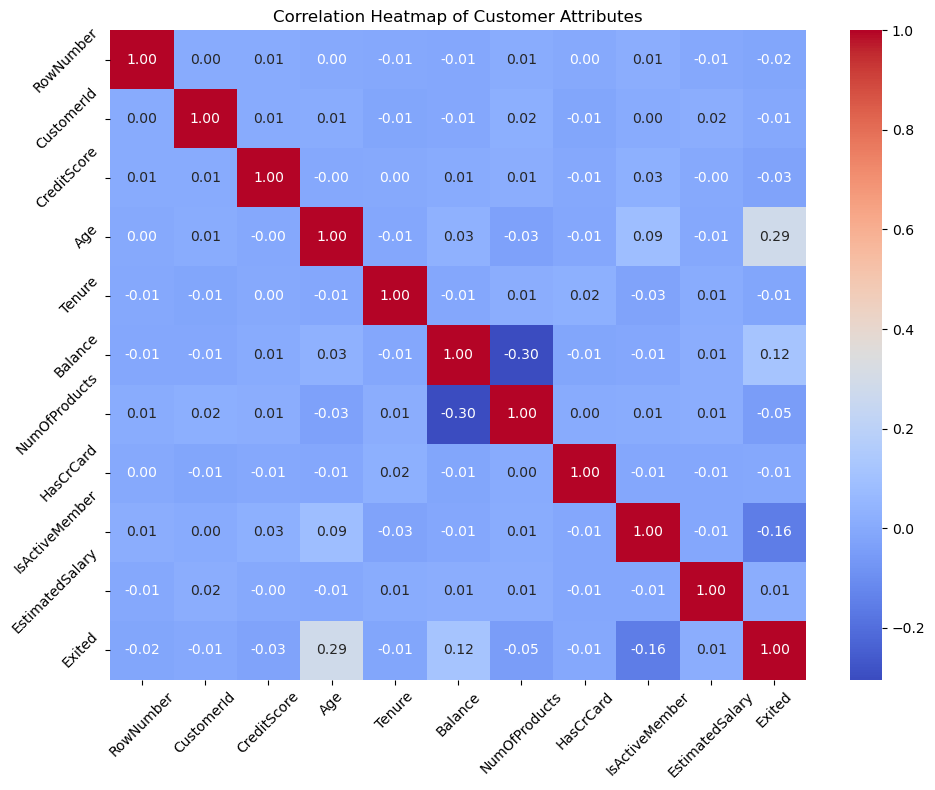

In [4]:
import seaborn as sns


# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Customer Attributes')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


This heatmap is titled "Correlation Heatmap of Customer Attributes." It visualizes the correlation coefficients between different customer attributes in the customer churn dataset. 1.0 indicates a perfect positive correlation, -1.0 indicates a perfect negative correlation, and 0 indicates no correlation.

Here are some points from this heatmap:

Diagonal Line of Ones: The diagonal from the top left to the bottom right consists of 1.0 values. This is expected, as each variable perfectly correlates with itself.

Balance and Number of Products: There is a negative correlation of -0.30 between Balance and Number of Products, this suggests that customers with higher balances tend to have fewer products with the company.

Age and Exited: There is a correlation of 0.29 between Age and Exited, indicating a slight positive correlation. This suggests older customers are slightly more likely to leave the company than younger ones.

HasCrCard and IsActiveMember: There’s a negative correlation of -0.16, indicating that customers who have a credit card with the company are slightly less likely to be active members.

Tenure and Balance: There's a small positive correlation of 0.12, implying that customers with longer tenure may have slightly higher balances.

Other Values: Most other correlations are close to zero, indicating very little linear relationship between these pairs of variables.

I used the color spectrum from blue to red effectively represents the range of correlation from negative to positive.

From a business perspective, this heatmap is a beginning point to guide analysis on customer retention. The moderate correlation between age and customer churn (Exited) could suggest that retention strategies might need to be age-specific. Similarly, the negative correlation between Balance and Number of Products might indicate that customers are not finding value in holding multiple products or there are missed opportunities for cross-selling to customers with significant balances.

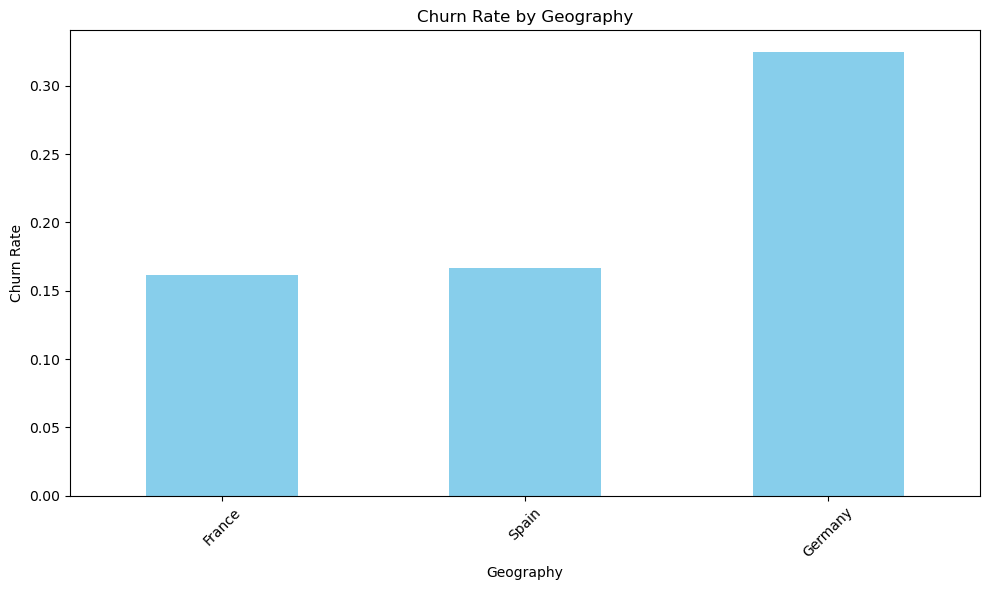

In [5]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(url)

# Calculate churn rates by geography
churn_rates = df.groupby('Geography')['Exited'].mean().sort_values()

# Plot churn rates by geography
plt.figure(figsize=(10, 6))
churn_rates.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


"Churn Rate by Geography" is a bar chart that illustrates the proportion of customers who have discontinued their service (churned) within three different geographic regions: France, Spain, and Germany.

Here's an explanation and analysis based on the graph:

Churn Rate Definition: The churn rate shown on the y-axis is the percentage of customers that stopped doing business with the company. It's calculated as the mean of the 'Exited' column for each country, 1 means the customer has exited, and 0 means they have stayed.

France: The bar representing France shows a churn rate slightly above 0.15, indicating that around 15% of the customers from France in the dataset have churned.

Spain: Spain's churn rate is shown to be similar to France's, also just above 0.15, meaning the proportion of customers who have left the company is approximately the same in Spain as it is in France.

Germany: Germany shows a higher churn rate, exceeding 0.30. This means that over 30% of the customers from Germany have churned, which is about twice as high as the churn rate in France or Spain.

From a business perspective, the higher churn rate in Germany warrants investigation. It suggests that there may be specific issues or market conditions in Germany that are not as prevalent in France or Spain. This could be due to a variety of factors, such as competition, customer satisfaction, economic conditions, cultural differences, or operational challenges specific to the German market.

In response to this analysis, a company might decide to:

Conduct further research to understand why the churn rate is higher in Germany.
Review the product or service offerings and customer service policies in Germany to identify any potential issues.
Explore strategic changes to marketing, customer engagement, or retention strategies in Germany to address the higher churn rate.

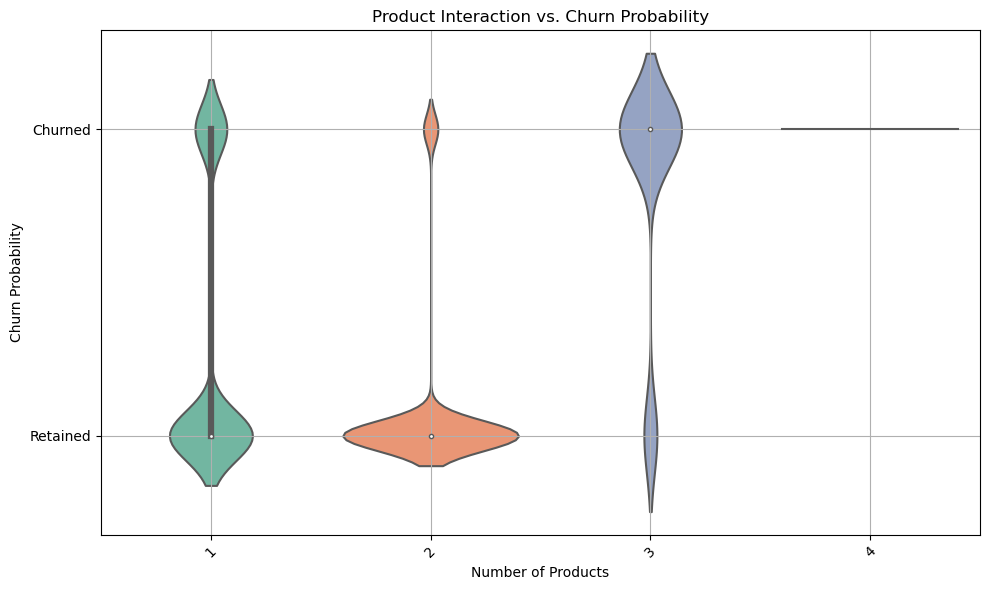

In [6]:
# Plotting the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='NumOfProducts', y='Exited', data=df, palette='Set2')
plt.title('Product Interaction vs. Churn Probability')
plt.xlabel('Number of Products')
plt.ylabel('Churn Probability')
plt.xticks(rotation=45)
plt.yticks([0, 1], ['Retained', 'Churned'])
plt.tight_layout()
plt.grid(True)
plt.show()

"Product Interaction vs. Churn Probability" is a violin plot which visualizes the distribution and probability of customers churning based on the number of products they interact with at a company.

Here’s an analysis of this plot:

X-axis (Number of Products): This axis categorizes customers based on the number of different products they have or use. Each violin represents a different number of products.
Y-axis (Churn Probability): The y-axis is binary, with 'Retained' (0) at the bottom and 'Churned' (1) at the top. This axis indicates whether the customer has churned or not.
Violin Shape: The width of the violin at different points corresponds to the density of data points at that probability. A wider section means more customers with that number of products have that churn status.


The violin corresponding to 1 product has a bulkier section at 'Retained', indicating a higher density of customers with one product have stayed with the company. The thinner section toward 'Churned' suggests a lower density of churned customers.

For customers with 2 products, there's a significantly lower density of customers who have churned. The violin is much skinnier on the 'Churned' side, which implies that having two products is associated with a lower likelihood of churning.

The last category for customers with 3+ projects has a very distinctive shape with a thicker area at 'Churned', suggesting a higher churn probability for customers with a greater number of products. This may indicate issues such as lack of product integration, or customer overwhelm.

Business Insights:

The company might consider evaluating the customer experience for those with more products to understand why there is a higher churn rate.
Strategies to encourage customers to use two products could be effective, as this seems to correlate with lower churn rates.
The distribution for 1 product is relatively even across 'Retained' and 'Churned', suggesting that while there's not a high risk of churning, there isn’t a strong retention factor either.



Conclusion:

Based on the graphical analysis conducted using a series of visualizations, there is  some valuable insights into customer behavior and the factors associated with churn.

Age and Churn: The first bar chart revealed that the churn rate is relatively consistent across different age groups, with a slight indication that older customers may be more likely to churn. This suggests that age alone may not be a strong predictor of churn, but it could be a contributing factor, particularly for older demographics.

Correlation of Customer Attributes: The heatmap showed several interesting correlations between customer attributes. A moderate positive correlation between age and churn indicates that older customers have a higher probability of exiting. A notable negative correlation was observed between the number of products a customer uses and their account balance, implying that customers with higher balances tend to have fewer products. This may indicate potential issues with product engagement or satisfaction.

Churn Rate by Geography: The bar chart comparing churn rates by geography highlighted that Germany has a significantly higher churn rate than France and Spain, more than double. This points to the possibility of underlying market-specific issues or dissatisfaction among German customers that requires further investigation.

Product Interaction and Churn: The violin plot examining product interaction against churn probability suggested that customers with just one product have a nearly even split between retention and churn, whereas those with two products seem to have a lower churn rate. On the other hand, customers with more products exhibited a higher probability of churning, which could indicate problems with product complexity or integration.

In conclusion, no single factor appears to predict customer churn, a combination of age, product engagement, geographical location, and possibly other unexamined factors, influence a customer's decision to stay with or leave the company.

## Part 2

In [7]:
# Drop features that are not useful for model building
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


RowNumber: This feature likely represents the row number or index of the dataset and does not provide any meaningful information for predicting churn, it can be dropped.

CustomerId: While customer identification may be useful for tracking individual customers, it is unlikely to be needed for predicting churn. 

Surname: The surname of the customer is unlikely to have any predictive power for churn prediction. It is considered irrelevant and can be dropped.

In [11]:
# Feature Engineering: Create a new feature representing the ratio of balance to salary
df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']

# Display the first few rows of the DataFrame to verify the new feature
print(df.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Balance_to_Salary_Ratio  
0          1               1        101348.88       1                 0.000000  
1          0               1        112542.58       0                 0.744677  
2          1               0        113931.57       1                 1.401375  
3          0               0         93826.63       0                 0.000000  
4          1               1         79084.10       0                 1.587055  


In [10]:
# Sample of the data
data = {
    'CreditScore': [619, 608, 502, 699, 850],
    'Geography': ['France', 'Spain', 'France', 'France', 'Spain'],
    'Gender': ['Female', 'Female', 'Female', 'Female', 'Female'],
    'Age': [42, 41, 42, 39, 43],
    'Tenure': [2, 1, 8, 1, 2],
    'Balance': [0.00, 83807.86, 159660.80, 0.00, 125510.82],
    'NumOfProducts': [1, 1, 3, 2, 1],
    'HasCrCard': [1, 0, 1, 0, 1],
    'IsActiveMember': [1, 1, 0, 0, 1],
    'EstimatedSalary': [101348.88, 112542.58, 113931.57, 93826.63, 79084.10],
    'Exited': [1, 0, 1, 0, 0]
}

# Create DataFrame
df = pd.DataFrame(data)

# Feature Engineering: Create a new feature representing the ratio of balance to salary
df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']

# Display the DataFrame
print(df)


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Balance_to_Salary_Ratio  
0          1               1        101348.88       1                 0.000000  
1          0               1        112542.58       0                 0.744677  
2          1               0        113931.57       1                 1.401375  
3          0               0         93826.63       0                 0.000000  
4          1               1         79084.10       0                 1.587055  


The new feature Balance_to_Salary_Ratio, represents the ratio of a customer's balance to their estimated salary, could help predict the likelihood of churn. 

Here's how this feature might be useful:

Financial Stability: A higher ratio may indicate that a customer is financially stable, as they have more funds in their account relative to their salary. Financially stable customers may be less likely to churn, as they are less likely to encounter financial difficulties that could prompt them to switch banks or cancel services.

Engagement and Loyalty: Customers who maintain a higher balance relative to their salary may be more engaged with the companies services and products. They may have multiple accounts, indicating a stronger relationship with the company. Higher engagement and loyalty can be associated with lower churn rates.

Risk Assessment: From a risk perspective, customers with a high balance-to-salary ratio may be less likely to default on thier account or miss payments. They may be considered lower risk customers, which could influence retention strategies and customer segmentation.

Targeted Marketing: Understanding the financial behavior of customers can inform targeted marketing campaigns. For example, customers with a high balance-to-salary ratio might be targeted with offers for premium services.

The Balance_to_Salary_Ratio feature can provide insights into a customer's financial health, engagement level, and risk profile, all of which are factors in predicting churn. 

In [12]:
import pandas as pd

# Sample of the data
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'UsageFrequency': [100, 80, 120, 70, 90],  # Sample usage frequency
    'OverduePayments': [0, 1, 0, 1, 0],  # 1 if overdue payments, 0 otherwise
    'SupportTickets': [2, 0, 3, 1, 0]  # Number of support tickets raised
}

# Create DataFrame
df = pd.DataFrame(data)

# Change in usage behavior: Calculate percentage change in usage frequency compared to historical patterns
df['UsageChange'] = df['UsageFrequency'].pct_change() * 100

# Billing irregularities: Identify customers with overdue payments
df['BillingIrregularity'] = df['OverduePayments'].apply(lambda x: 1 if x == 1 else 0)

# Customer complaints or support tickets: Count the number of complaints or support tickets raised within a specific time period
df['SupportTicketCount'] = df['SupportTickets']

# Display the DataFrame
print(df)


   CustomerID  UsageFrequency  OverduePayments  SupportTickets  UsageChange  \
0           1             100                0               2          NaN   
1           2              80                1               0   -20.000000   
2           3             120                0               3    50.000000   
3           4              70                1               1   -41.666667   
4           5              90                0               0    28.571429   

   BillingIrregularity  SupportTicketCount  
0                    0                   2  
1                    1                   0  
2                    0                   3  
3                    1                   1  
4                    0                   0  


Based on this data, here are the observations:

Customer 1 has a UsageFrequency of 100, indicating moderate usage. They have no overdue payments and have raised 2 support tickets recently. Their usage change is NaN, indicating that historical usage data might be missing.

Customer 2 has a lower UsageFrequency of 80 and has overdue payments (BillingIrregularity = 1). They have not raised any support tickets recently. Their usage change is -20%, indicating a decrease in usage compared to historical patterns.

Customer 3 has a higher UsageFrequency of 120, indicating frequent usage. They have no overdue payments and have raised 3 support tickets recently. Their usage change is 50%, indicating an increase in usage compared to historical patterns.

Customer 4 has the lowest UsageFrequency of 70 and has overdue payments (BillingIrregularity = 1). They have raised 1 support ticket recently. Their usage change is -41.67%, indicating a significant decrease in usage compared to historical patterns.

Customer 5 has a UsageFrequency of 90 and has no overdue payments. They have not raised any support tickets recently. Their usage change is 28.57%, indicating an increase in usage compared to historical patterns.

Overall, this data provides insights into customer behavior and potential churn risk factors, such as changes in usage patterns, billing irregularities, and interaction with customer support. These insights can be used to develop targeted retention strategies and prioritize efforts to retain customers who are at risk of churn.

In [15]:
# Create a binary indicator variable to flag missing values
df['UsageChange'] = df['UsageChange'].isna().astype(int)

# Display the DataFrame
print(df)

   CustomerID  UsageFrequency  OverduePayments  SupportTickets  UsageChange  \
0           1             100                0               2            1   
1           2              80                1               0            0   
2           3             120                0               3            0   
3           4              70                1               1            0   
4           5              90                0               0            0   

   BillingIrregularity  SupportTicketCount  column_name_flag  
0                    0                   2                 1  
1                    1                   0                 0  
2                    0                   3                 0  
3                    1                   1                 0  
4                    0                   0                 0  


The code sets the UsageChange column's column_name_flag to 1 where there are missing values (NaN) in the UsageChange column, and 0 where there are no missing values. 

For CustomerID 1, there is a missing value in the UsageChange column, so column_name_flag is set to 1.

For Customers 2, 3, 4, and 5, there are no missing values in the UsageChange column, so column_name_flag is set to 0.

This flags missing values in the UsageChange column, identifying the customer for further analysis.

## Part 3 code final 

In [68]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/cheribeda/datamining/main/Churn.csv'
df = pd.read_csv(url)

# Drop non-useful columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Create Balance_to_Salary_Ratio
df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']

# Log transform of skewed features
df['Log_Balance'] = np.log1p(df['Balance'])
df['Log_EstimatedSalary'] = np.log1p(df['EstimatedSalary'])

# Binning Age into categories
df['Age_bin'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=[0, 1, 2, 3, 4])

# Polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[['Age', 'Balance', 'EstimatedSalary']])
poly_feature_names = poly.get_feature_names_out(['Age', 'Balance', 'EstimatedSalary'])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
df = pd.concat([df, df_poly], axis=1)

# Drop the original features that were transformed
df.drop(['Balance', 'EstimatedSalary'], axis=1, inplace=True)

# Define features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data loaded and preprocessed")


Data loaded and preprocessed


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve

def train_random_forest(X_train, y_train, class_weight='balanced'):
    rf = RandomForestClassifier(
        random_state=42,
        max_depth=10,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=300,
        class_weight=class_weight
    )
    rf.fit(X_train, y_train)
    return rf

# Train the model
rf = train_random_forest(X_train, y_train)
print("Model trained")


Model trained


In [70]:
def evaluate_model(rf, X_test, y_test):
    y_prob = rf.predict_proba(X_test)[:, 1]
    y_pred = rf.predict(X_test)
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    
    # Find the threshold for the desired balance
    balanced_threshold_index = np.argmin(abs(precision - recall))
    balanced_threshold = thresholds[balanced_threshold_index]
    
    y_pred_balanced = (y_prob >= balanced_threshold).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred_balanced)
    precision = precision_score(y_test, y_pred_balanced)
    recall = recall_score(y_test, y_pred_balanced)
    f1 = f1_score(y_test, y_pred_balanced)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    return balanced_threshold, accuracy, precision, recall, f1, roc_auc

# Evaluate the model
balanced_threshold, accuracy, precision, recall, f1, roc_auc = evaluate_model(rf, X_test, y_test)
print(f"Balanced Threshold: {balanced_threshold}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")


Balanced Threshold: 0.5181898352793235
Accuracy: 0.846
Precision: 0.6081424936386769
Recall: 0.6081424936386769
F1 Score: 0.6081424936386769
ROC-AUC: 0.8579275466272717


In [77]:
# Explanation of Model Evaluation Metrics
# The output of the model provides several key metrics that describe the performance of the Random Forest model 
# for predicting customer churn.

# Balanced Threshold: 0.5181898352793235
# Definition: The threshold is the probability value above which a customer is predicted to churn. 
# Interpretation: A threshold of 0.518 means that customers with a predicted probability of churn higher than 51.8% are classified as churners. This threshold was chosen to balance precision and recall, ensuring both metrics are equally considered.

# Accuracy: 0.846
# Definition: Accuracy is the ratio of correctly predicted instances to the total instances.
# Interpretation: An accuracy of 84.6% means that 84.6% of the predictions made by the model are correct.

# Precision: 0.6081424936386769
# Definition: Precision is the ratio of true positive predictions to the total positive predictions 
# Interpretation: A precision of 60.8% means that when the model predicts a customer will churn, 
# it is correct 60.8% of the time.  

# Recall: 0.6081424936386769
# Definition: Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions 
# to the actual positive instances.
# Interpretation: A recall of 60.8% means that the model correctly identifies 60.8% of the customers who actually churn. 
# This is crucial for capturing as many churners as possible.

#F1 Score: 0.6081424936386769
# Definition: The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both concerns.
# Interpretation: An F1 score of 60.8% indicates a balanced performance between precision and recall. 
# It is useful when you need to balance both false positives and false negatives.

# ROC-AUC: 0.8579275466272717
# Definition: The ROC-AUC score (Receiver Operating Characteristic - Area Under the Curve) 
# measures the model's ability to distinguish between positive and negative classes.
# Interpretation: An ROC-AUC score of 0.8579 indicates that the model has a good ability to differentiate 
# between churners and non-churners. The value ranges from 0.5 (no discrimination) to 1 (perfect discrimination).

# Summary 
# Balanced Performance: The precision and recall are both approximately 60.8%, indicating a balanced performance. 
# The model effectively identifies churners while maintaining a reasonable rate of false positives.
# Good Discrimination: The high ROC-AUC score (0.8579) confirms that the model has a strong ability to distinguish 
# between customers who will churn and those who will not.
# Balanced Threshold: Using a balanced threshold ensures that the model considers both precision and recall, 
# making it practical for real-world applications where both types of errors are important.


# Business Use: Using the insights from the model to develop targeted retention strategies for at-risk customers.

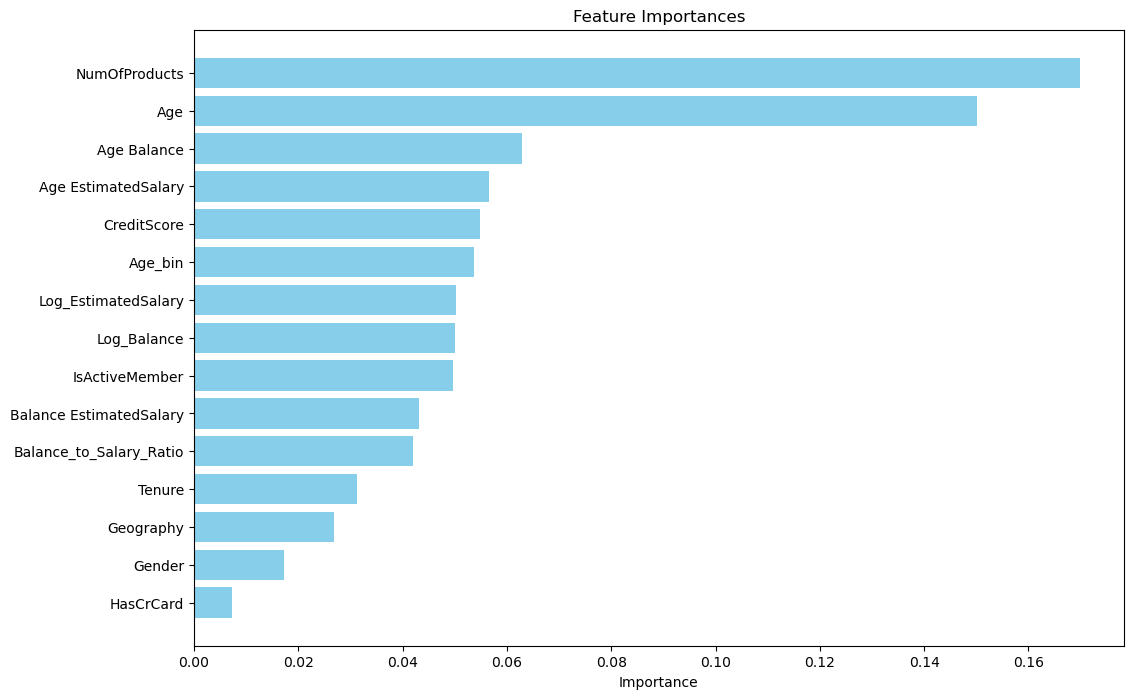

Top 10 Important Features:
                Feature  Importance
5         NumOfProducts    0.169789
12                  Age    0.150122
3                   Age    0.134318
13          Age Balance    0.062825
14  Age EstimatedSalary    0.056501
0           CreditScore    0.054906
11              Age_bin    0.053753
10  Log_EstimatedSalary    0.050236
9           Log_Balance    0.050089
7        IsActiveMember    0.049616


In [71]:
import matplotlib.pyplot as plt

def plot_feature_importances(rf, feature_names):
    feature_importances = rf.feature_importances_
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.title('Feature Importances')
    plt.gca().invert_yaxis()
    plt.show()
    
    return importance_df

# Plot feature importances
feature_names = df.drop('Exited', axis=1).columns
importance_df = plot_feature_importances(rf, feature_names)

# Display the top 10 important features
print("Top 10 Important Features:")
print(importance_df.head(10))


In [79]:
# The following are the top 10 features ranked by their importance in predicting customer churn, 
# as provided by the Random Forest model. 

# NumOfProducts (Importance: 0.169789)
# Interpretation: The number of products a customer uses is the most important predictor of churn. 
# Customers with fewer products are more likely to churn, indicating that product engagement is critical to retention.

# Age (Importance: 0.150122)
# Interpretation: Age is a key predictor of churn. 
# Different age groups may have varying levels of loyalty or engagement. 

# Age Balance (Importance: 0.062825)
# Interpretation: This interaction term between age and balance highlights the relationship between a customer's age
# and their account balance in predicting churn.

# Age EstimatedSalary (Importance: 0.056501)
# Interpretation: This interaction term between age and estimated salary indicates that the combined effect of a 
# customer’s age and salary level is important in determining churn. 
# Different age-income combinations can signal different risk levels.

# CreditScore (Importance: 0.054906)
# Interpretation: Customers' credit scores are an important predictor of churn. 
# A higher credit score may indicate financial stability, which might correlate with lower churn risk.

# Age_bin (Importance: 0.053753)
# Interpretation: Binning age into categories continues to supports the importance of age in predicting churn.
# Different age groups (bins) exhibit different churn behaviors.

# Log_EstimatedSalary (Importance: 0.050236)
# Interpretation: The logarithmically transformed estimated salary indicates the financial status of customers, 
# with transformations helping to manage skewed data and highlight income-related churn risk.

# Log_Balance (Importance: 0.050089)
# Interpretation: The logarithmically transformed balance is also crucial. 
# It helps to identify how account balance affects churn while managing the impact of extreme values.

# IsActiveMember (Importance: 0.049616)
# Interpretation: Whether a customer is an active member or not significantly affects churn. 
# Active members are generally more engaged and less likely to churn.

# Summary
# The top predictors of customer churn identified by the model are:

# NumOfProducts: Engagement with multiple products is a strong indicator of customer retention.
# Age: Age is repeatedly highlighted, indicating its critical role in predicting churn. 
# Both linear and interaction effects with other features like balance and salary are important.
# Financial Metrics: Features related to a customer’s financial status, such as credit score, balance, 
# and estimated salary, are crucial.
# Customer Activity: Active membership status is also an important factor.

# Business Insights and Actions

# Product Engagement:

# Increase efforts to cross-sell and up-sell products to customers, 
# as engagement with multiple products reduces churn.

# Age-Specific Strategies:
# Develop age-targeted retention strategies. An example could be offer different products or incentives tailored to different age groups.

# Financial Health Monitoring:
# Pay attention to customers’ financial health. Provide financial advice, personalized offers, 
# or support to customers with lower balances or credit scores to enhance loyalty.

# Active Member Programs:
# Encourage customers to become active members through loyalty programs, rewards, and engagement initiatives.
